# **NAME : SAHITHYA KOLLIPARA**
# PROJECT NAME :** Housing Prices Prediction Project**

PEOJECT IDEA– The dataset has house prices of the Boston residual areas.
The expense of the house varies according to various factors like crime rate, number of rooms, etc.

Dataset: https://bit.ly/3uU4dtg

## **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Looding the dataset**

In [ ]:
boston = load_boston()
print (boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
print(dataset.keys()) #printing the index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


# **Checking the missing values**

In [ ]:
dataset.isnull().sum() 
#Before importing the dataset, I have sanitized the dataset.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# **Implementing Seaborn plots**

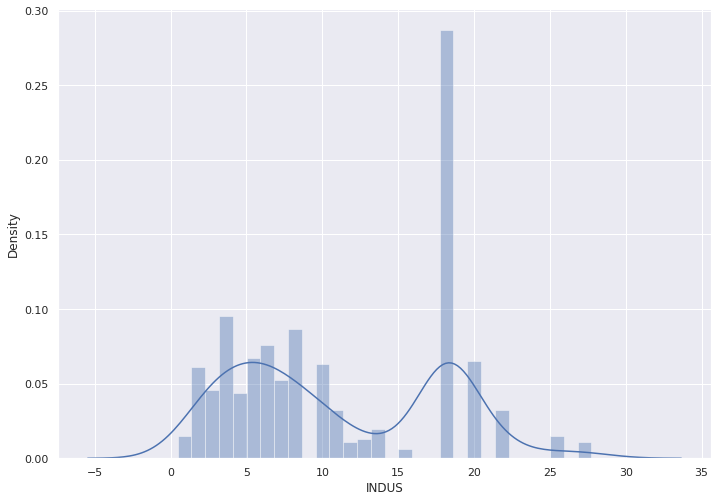

In [ ]:
#creating distplot using seaborn Library
sb.set(rc = {'figure.figsize':(11.7,8.27)})
sb.distplot(dataset['INDUS'], bins = 30)
plt.show()

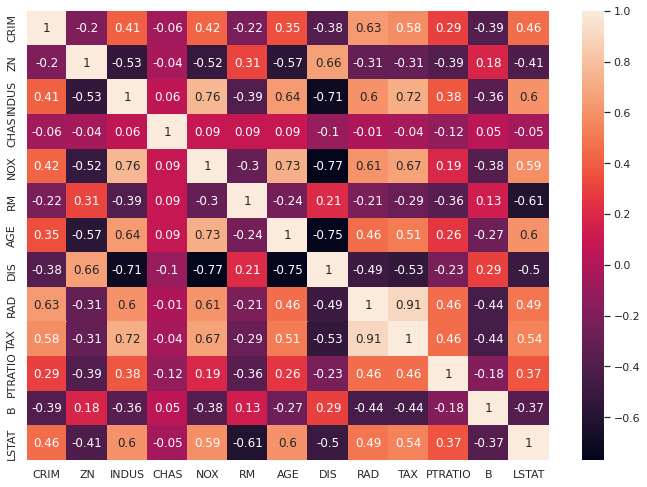

In [ ]:
#creating heatmap using seaborn library
correlation_matrix = dataset.corr().round(2)

# annot = True to print the values inside the square
sb.heatmap(data = correlation_matrix, annot = True);

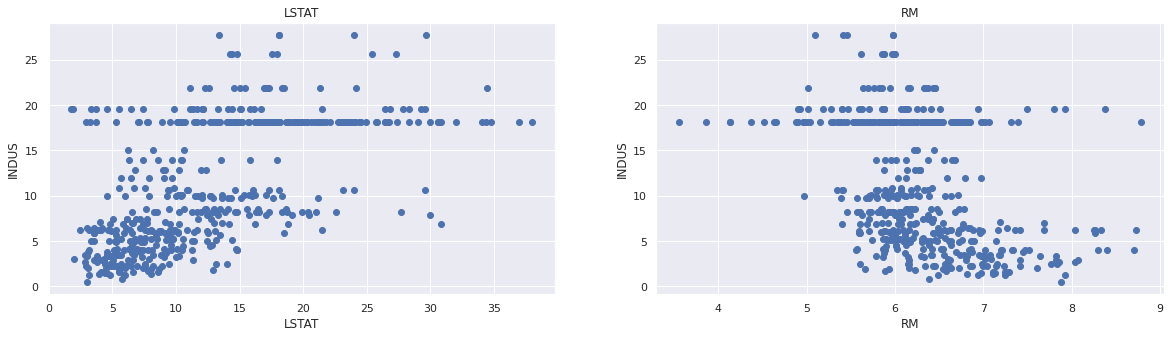

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = dataset['INDUS']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('INDUS')

In [ ]:
X = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['INDUS']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import sklearn.metrics as metrics

In [ ]:
print('R^2:', metrics.r2_score(Y_train, Y_pred))
#r2 = metrics.r2_score(Y_train, Y_pred)
#print(r2)

R^2: 0.9025677732212458


In [ ]:
#print('Adjusted R^2:', 1 - (1-metrics.r2_score(Y_train, Y_pred) * len(Y_train) - X_train.shape[1]-1))
#print(1 - (1-r2 * (len(Y_train) - 1/(len(Y_train) - X_train.shape[0] - 1))))

In [ ]:
# model evaluation for training set

rmse = (np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

print("The model performance(RMSE):")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('\n')

mse = (metrics.mean_squared_error(Y_train, Y_pred))

print("The model performance(MSE):")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

mae = (metrics.mean_absolute_error(Y_train, Y_pred))

print("The model performance(MAE):")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

The model performance(RMSE):
--------------------------------------
RMSE is 2.10038784323984


The model performance(MSE):
--------------------------------------
MSE is 4.411629092029707


The model performance(MAE):
--------------------------------------
MAE is 1.5691396039603986




# **Data Visualisation**

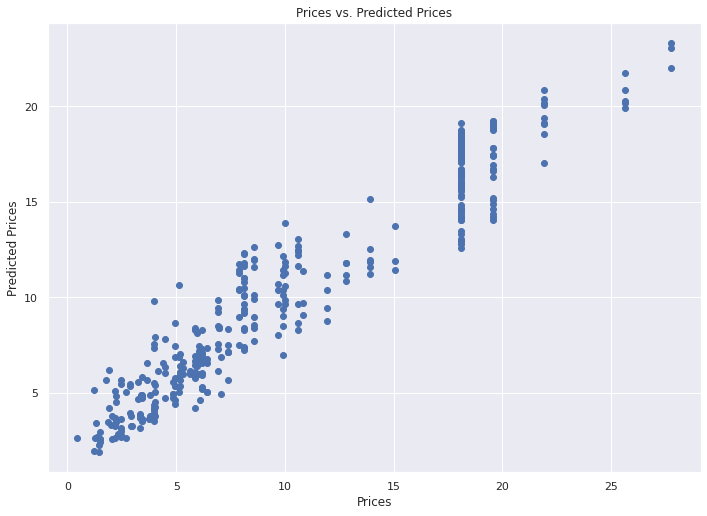

In [ ]:
plt.scatter(Y_train, Y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs. Predicted Prices')
plt.show()

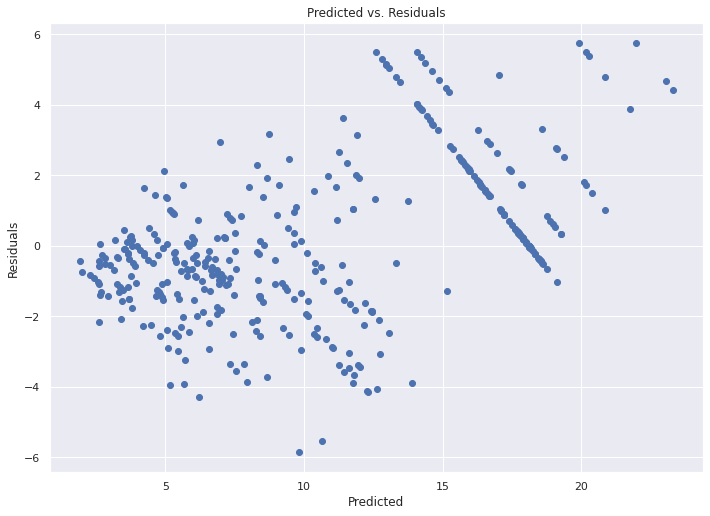

In [ ]:
plt.scatter(Y_pred, Y_train - Y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Predicted vs. Residuals")
plt.show()

# **Results:**

Random Forest Regressor works best for this dataset.
R2 score is 96% accurate on this dataset.